In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [ ]:
import keras
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, SimpleRNN
from statsmodels.tsa.arima_process import arma_generate_sample
from keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose


In [ ]:
from google.colab import files
import io
import pandas as pd
myfile = files.upload()
data = pd.read_excel(io.BytesIO(myfile['ateez.xlsx']))

Saving ateez.xlsx to ateez.xlsx


In [ ]:
feature_list = list(data.columns[2:])
features=data.iloc[:, 2:]
target = data.iloc[:, 1]
time = data.iloc[:, 0]
# feautre_list: 특성 이름들
# features : target 제외한 데이터셋 

In [ ]:
high_temp = features['평균최고기온'].tolist()
low_temp = features['평균최저기온'].tolist()
avg_rainfall = features['평균강수량'].tolist()
avg_humidity = features['평균습도'].tolist()

In [ ]:
Tropical = features['열대야'].tolist()
ExchangeRate = features['환율'].tolist()
GoldTrading = features['금 거래량(g)'].tolist()
GoldPrice = features['(금)시가'].tolist()

In [ ]:
GreenGasKor = features['(한국 온실가스)총배출량'].tolist()
Gasoline = features['보통휘발유가격'].tolist()
Diesel = features['자동차용경유가격'].tolist()
Indoor_Kerosene = features['실내등유가격'].tolist()
GreenGasGlobal = features['(세계 온실가스)총배출량'].tolist()
GDP = features['국내총생산(명목, 원화표시) (십억원)'].tolist()
Avg_SeaLevel = features['(세계) 해수면 평균기온(℃)'].tolist()
Economic_Growth = features['경제 성장률'].tolist()
people = features['인구수'].tolist()

In [ ]:
time = data.iloc[:, 0]

Text(0.5, 1.0, 'the number of people')

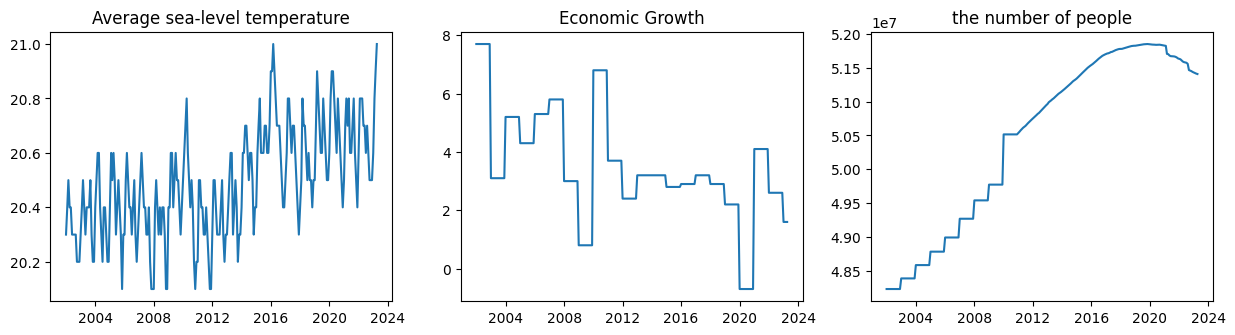

In [ ]:
fig4, axes4 = plt.subplots(1, 3, figsize=(15, 3.5))
axes4[0].plot(time, Avg_SeaLevel)
axes4[0].set_title('Average sea-level temperature')

axes4[1].plot(time, Economic_Growth)
axes4[1].set_title('Economic Growth')

axes4[2].plot(time, people)
axes4[2].set_title('the number of people')

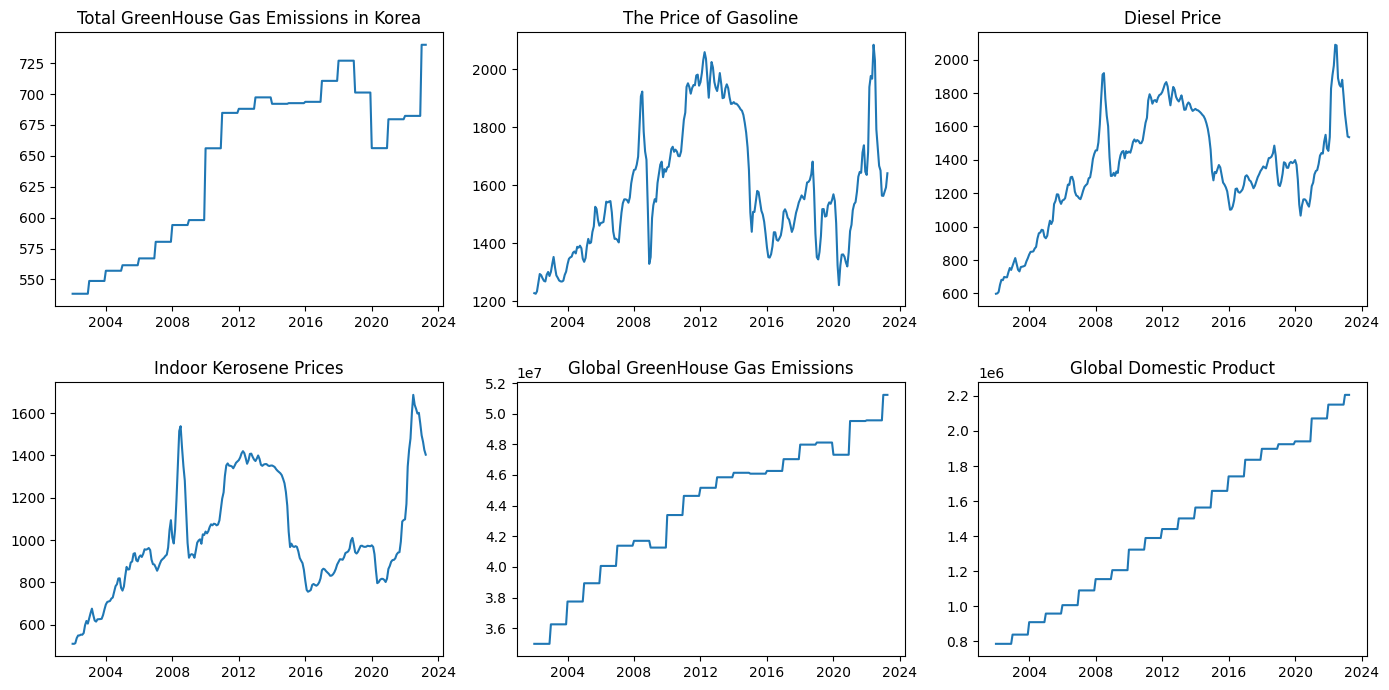

In [ ]:
fig3, axes3 = plt.subplots(2, 3, figsize=(14, 7))
axes3[0, 0].plot(time, GreenGasKor)
axes3[0, 0].set_title('Total GreenHouse Gas Emissions in Korea')

axes3[0, 1].plot(time, Gasoline)
axes3[0, 1].set_title('The Price of Gasoline')

axes3[0, 2].plot(time, Diesel)
axes3[0, 2].set_title('Diesel Price')

axes3[1, 0].plot(time, Indoor_Kerosene)
axes3[1, 0].set_title('Indoor Kerosene Prices')

axes3[1, 1].plot(time, GreenGasGlobal)
axes3[1, 1].set_title('Global GreenHouse Gas Emissions')

axes3[1, 2].plot(time, GDP)
axes3[1, 2].set_title('Global Domestic Product')

plt.tight_layout()

Text(0.5, 1.0, 'Average Humidity')

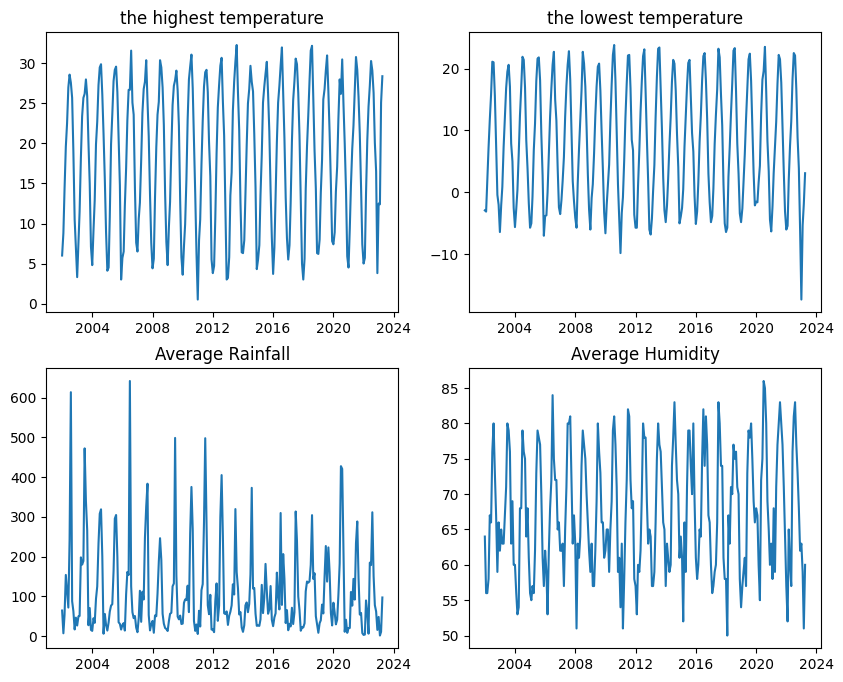

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
axes[0, 0].plot(time, high_temp)
axes[0, 0].set_title('the highest temperature')

axes[0, 1].plot(time, low_temp)
axes[0, 1].set_title('the lowest temperature')

axes[1, 0].plot(time, avg_rainfall)
axes[1, 0].set_title('Average Rainfall')

axes[1, 1].plot(time, avg_humidity)
axes[1, 1].set_title('Average Humidity')

Text(0.5, 1.0, 'Gold Price')

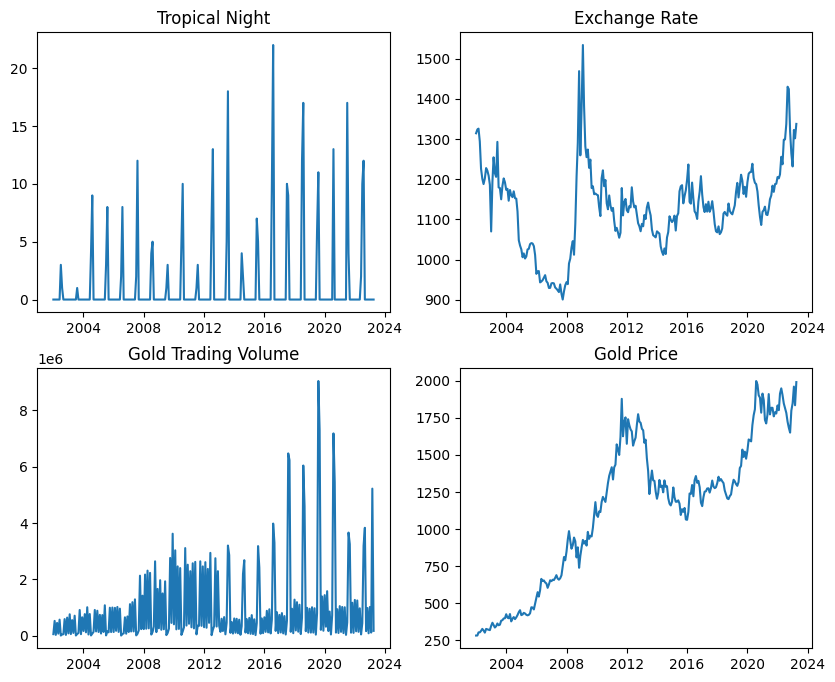

In [ ]:
fig2, axes2 = plt.subplots(2, 2, figsize=(10, 8))
axes2[0, 0].plot(time, Tropical)
axes2[0, 0].set_title('Tropical Night')

axes2[0, 1].plot(time, ExchangeRate)
axes2[0, 1].set_title('Exchange Rate')

axes2[1, 0].plot(time, GoldTrading )
axes2[1, 0].set_title('Gold Trading Volume')

axes2[1, 1].plot(time, GoldPrice)
axes2[1, 1].set_title('Gold Price')

In [ ]:


# 시계열 데이터 로드
data = pd.read_csv('your_data.csv', parse_dates=True, index_col='date')

# 시계열 분해 수행하여 추세 및 계절성 제거
decomposition = seasonal_decompose(data, model='additive')
trend = decomposition.trend
residual = decomposition.resid

# 추세 및 계절성 제거한 시계열 데이터 생성
data_deseasonalized = data - trend
data_detrended = data - residual

# 랜덤 포레스트 모델에 적용하기 위한 데이터 준비
X = data_detrended.dropna()  # 독립 변수
y = data_detrended.shift(-1).dropna()  # 종속 변수 (1 step ahead 예측을 위해 한 시점 뒤로 shift)

# 랜덤 포레스트 모델 학습
rf = RandomForestRegressor()
rf.fit(X, y)

# 예측 수행
next_step_input = X.iloc[-1].values.reshape(1, -1)  # 다음 시점에 대한 입력 데이터
prediction = rf.predict(next_step_input)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# 시계열 데이터 로드
data = pd.read_csv('your_data.csv')

# 1차 차분 수행
differenced_data = data.diff().dropna()

# ACF 그래프를 통한 정상성 평가
plot_acf(differenced_data)
plt.show()

import pandas as pd

# 시계열 데이터 로드
data = pd.read_csv('your_data.csv')

# 2차 차분 수행
first_diff = data.diff().dropna()
second_diff = first_diff.diff().dropna()


In [ ]:
diff_features = features.diff().dropna()
diff_target = target.diff().dropna()

In [ ]:
#2차 차분 수행

second_features = diff_features.diff().dropna()
second_target = diff_target.diff().dropna()

In [ ]:
diff_target

1     -3253.196181
2      2468.553342
3     -1368.948208
4       761.282307
5      -485.087335
          ...     
251    8550.796615
252   -1237.890614
253   -5912.053317
254   -1662.035663
255   -3551.968782
Name: 전력시장+PPA 계, Length: 255, dtype: float64

In [ ]:
diff_data = pd.concat([time, diff_features, diff_target], axis = 1)

In [ ]:
print(diff_data)

             월  평균최고기온  평균최저기온  평균강수량  평균습도  열대야    환율   금 거래량(g)   (금)시가  \
0   2002-01-01     NaN     NaN    NaN   NaN  NaN   NaN        NaN     NaN   
1   2002-02-01     2.8    -0.2  -57.3  -8.0  0.0   9.4   470130.0    0.40   
2   2002-03-01     5.5     4.9   46.4   0.0  0.0   2.1  -495840.0   20.90   
3   2002-04-01     5.3     5.4  100.6   2.0  0.0 -31.9   423320.0    0.10   
4   2002-05-01     2.9     4.5  -40.1   9.0  0.0 -67.7  -378700.0   10.20   
..         ...     ...     ...    ...   ...  ...   ...        ...     ...   
251 2022-12-01   -12.7    -9.9  -46.4  -6.0  0.0 -54.3  -898250.0  148.10   
252 2023-01-01     8.7   -11.3   32.7   1.0  0.0 -32.6   934450.0   49.20   
253 2023-02-01    -0.1    12.0  -46.9  -4.0  0.0  90.7  -908400.0  112.50   
254 2023-03-01    12.7     3.4    9.5  -8.0  0.0 -20.7  5108400.0 -125.70   
255 2023-04-01     3.3     5.0   86.4   9.0  0.0  35.8 -5047550.0  156.05   

     (한국 온실가스)총배출량  보통휘발유가격  자동차용경유가격  실내등유가격  (세계 온실가스)총배출량  \
0          

In [ ]:
data = pd.DataFrame(diff_data)

In [ ]:
data

,월,평균최고기온,평균최저기온,평균강수량,평균습도,열대야,환율,금 거래량(g),(금)시가,(한국 온실가스)총배출량,보통휘발유가격,자동차용경유가격,실내등유가격,(세계 온실가스)총배출량,"국내총생산(명목, 원화표시) (십억원)",(세계) 해수면 평균기온(℃),경제 성장률,인구수,전력시장+PPA 계
0,2002-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2002-02-01,2.8,-0.2,-57.3,-8.0,0.0,9.4,470130.0,0.40,0.0000,-2.07,2.20,-0.25,0.0,0.0,0.1,0.0,0.0,-3253.196181
2,2002-03-01,5.5,4.9,46.4,0.0,0.0,2.1,-495840.0,20.90,0.0000,8.19,9.10,2.87,0.0,0.0,0.1,0.0,0.0,2468.553342
3,2002-04-01,5.3,5.4,100.6,2.0,0.0,-31.9,423320.0,0.10,0.0000,31.46,43.54,24.12,0.0,0.0,-0.1,0.0,0.0,-1368.948208
4,2002-05-01,2.9,4.5,-40.1,9.0,0.0,-67.7,-378700.0,10.20,0.0000,28.38,28.62,12.29,0.0,0.0,0.0,0.0,0.0,761.282307
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,2022-12-01,-12.7,-9.9,-46.4,-6.0,0.0,-54.3,-898250.0,148.10,0.0000,-86.64,-95.94,-49.14,0.0,0.0,0.0,0.0,-11791.0,8550.796615
252,2023-01-01,8.7,-11.3,32.7,1.0,0.0,-32.6,934450.0,49.20,57.5187,-0.75,-107.84,-57.30,1661598.8,55687.2,0.1,-1.0,-9020.0,-1237.890614
253,2023-02-01,-0.1,12.0,-46.9,-4.0,0.0,90.7,-908400.0,112.50,0.0000,15.56,-68.96,-30.83,0.0,0.0,0.2,0.0,-8539.0,-5912.053317
254,2023-03-01,12.7,3.4,9.5,-8.0,0.0,-20.7,5108400.0,-125.70,0.0000,13.76,-66.69,-37.97,0.0,0.0,0.1,0.0,-7198.0,-1662.035663


In [ ]:
diff2_data = pd.concat([second_features, second_target], axis=1)

In [ ]:
print(diff2_data)

     평균최고기온  평균최저기온  평균강수량  평균습도  열대야     환율    금 거래량(g)   (금)시가  \
2       2.7     5.1  103.7   8.0  0.0   -7.3   -965970.0   20.50   
3      -0.2     0.5   54.2   2.0  0.0  -34.0    919160.0  -20.80   
4      -2.4    -0.9 -140.7   7.0  0.0  -35.8   -802020.0   10.10   
5       1.6    -0.4   -2.0 -10.0  0.0   42.7    873960.0    3.10   
6      -2.9     1.2  211.3  11.0  3.0   11.7  -1059000.0  -23.80   
..      ...     ...    ...   ...  ...    ...         ...     ...   
251    -9.1    -4.9  -30.4  -1.0  0.0   51.2  -1719600.0  180.60   
252    21.4    -1.4   79.1   7.0  0.0   21.7   1832700.0  -98.90   
253    -8.8    23.3  -79.6  -5.0  0.0  123.3  -1842850.0   63.30   
254    12.8    -8.6   56.4  -4.0  0.0 -111.4   6016800.0 -238.20   
255    -9.4     1.6   76.9  17.0  0.0   56.5 -10155950.0  281.75   

     (한국 온실가스)총배출량  보통휘발유가격  자동차용경유가격  실내등유가격  (세계 온실가스)총배출량  \
2           0.0000    10.26      6.90    3.12            0.0   
3           0.0000    23.27     34.44   21.25          

In [ ]:
new_data = pd.DataFrame(diff2_data)

In [ ]:
new_data

,평균최고기온,평균최저기온,평균강수량,평균습도,열대야,환율,금 거래량(g),(금)시가,(한국 온실가스)총배출량,보통휘발유가격,자동차용경유가격,실내등유가격,(세계 온실가스)총배출량,"국내총생산(명목, 원화표시) (십억원)",(세계) 해수면 평균기온(℃),경제 성장률,인구수,전력시장+PPA 계
2,2.7,5.1,103.7,8.0,0.0,-7.3,-965970.0,20.50,0.0000,10.26,6.90,3.12,0.0,0.0,3.552714e-15,0.0,0.0,5721.749523
3,-0.2,0.5,54.2,2.0,0.0,-34.0,919160.0,-20.80,0.0000,23.27,34.44,21.25,0.0,0.0,-2.000000e-01,0.0,0.0,-3837.501550
4,-2.4,-0.9,-140.7,7.0,0.0,-35.8,-802020.0,10.10,0.0000,-3.08,-14.92,-11.83,0.0,0.0,1.000000e-01,0.0,0.0,2130.230515
5,1.6,-0.4,-2.0,-10.0,0.0,42.7,873960.0,3.10,0.0000,-32.42,-30.76,-11.94,0.0,0.0,-1.000000e-01,0.0,0.0,-1246.369643
6,-2.9,1.2,211.3,11.0,3.0,11.7,-1059000.0,-23.80,0.0000,-6.66,21.54,3.62,0.0,0.0,1.000000e-01,0.0,0.0,2417.991156
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,-9.1,-4.9,-30.4,-1.0,0.0,51.2,-1719600.0,180.60,0.0000,-70.31,-136.75,-52.76,0.0,0.0,0.000000e+00,0.0,-2994.0,7966.081583
252,21.4,-1.4,79.1,7.0,0.0,21.7,1832700.0,-98.90,57.5187,85.89,-11.90,-8.16,1661598.8,55687.2,1.000000e-01,-1.0,2771.0,-9788.687230
253,-8.8,23.3,-79.6,-5.0,0.0,123.3,-1842850.0,63.30,-57.5187,16.31,38.88,26.47,-1661598.8,-55687.2,1.000000e-01,1.0,481.0,-4674.162702
254,12.8,-8.6,56.4,-4.0,0.0,-111.4,6016800.0,-238.20,0.0000,-1.80,2.27,-7.14,0.0,0.0,-1.000000e-01,0.0,1341.0,4250.017654


In [ ]:
new_data.insert(0, '월', time)

In [ ]:
new_data

,월,평균최고기온,평균최저기온,평균강수량,평균습도,열대야,환율,금 거래량(g),(금)시가,(한국 온실가스)총배출량,보통휘발유가격,자동차용경유가격,실내등유가격,(세계 온실가스)총배출량,"국내총생산(명목, 원화표시) (십억원)",(세계) 해수면 평균기온(℃),경제 성장률,인구수,전력시장+PPA 계
2,2002-03-01,2.7,5.1,103.7,8.0,0.0,-7.3,-965970.0,20.50,0.0000,10.26,6.90,3.12,0.0,0.0,3.552714e-15,0.0,0.0,5721.749523
3,2002-04-01,-0.2,0.5,54.2,2.0,0.0,-34.0,919160.0,-20.80,0.0000,23.27,34.44,21.25,0.0,0.0,-2.000000e-01,0.0,0.0,-3837.501550
4,2002-05-01,-2.4,-0.9,-140.7,7.0,0.0,-35.8,-802020.0,10.10,0.0000,-3.08,-14.92,-11.83,0.0,0.0,1.000000e-01,0.0,0.0,2130.230515
5,2002-06-01,1.6,-0.4,-2.0,-10.0,0.0,42.7,873960.0,3.10,0.0000,-32.42,-30.76,-11.94,0.0,0.0,-1.000000e-01,0.0,0.0,-1246.369643
6,2002-07-01,-2.9,1.2,211.3,11.0,3.0,11.7,-1059000.0,-23.80,0.0000,-6.66,21.54,3.62,0.0,0.0,1.000000e-01,0.0,0.0,2417.991156
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,2022-12-01,-9.1,-4.9,-30.4,-1.0,0.0,51.2,-1719600.0,180.60,0.0000,-70.31,-136.75,-52.76,0.0,0.0,0.000000e+00,0.0,-2994.0,7966.081583
252,2023-01-01,21.4,-1.4,79.1,7.0,0.0,21.7,1832700.0,-98.90,57.5187,85.89,-11.90,-8.16,1661598.8,55687.2,1.000000e-01,-1.0,2771.0,-9788.687230
253,2023-02-01,-8.8,23.3,-79.6,-5.0,0.0,123.3,-1842850.0,63.30,-57.5187,16.31,38.88,26.47,-1661598.8,-55687.2,1.000000e-01,1.0,481.0,-4674.162702
254,2023-03-01,12.8,-8.6,56.4,-4.0,0.0,-111.4,6016800.0,-238.20,0.0000,-1.80,2.27,-7.14,0.0,0.0,-1.000000e-01,0.0,1341.0,4250.017654


In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

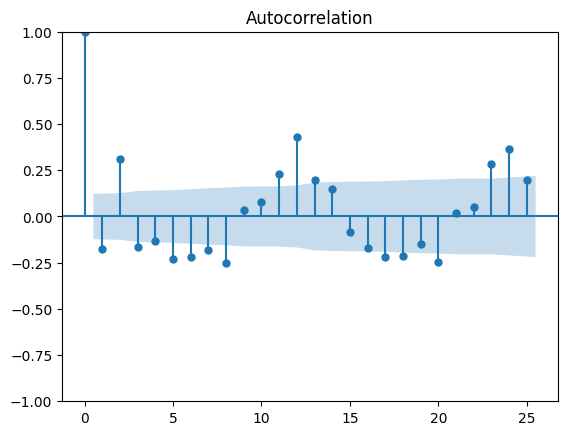

In [ ]:
plot_acf(second_features['평균최고기온'])
plt.show()

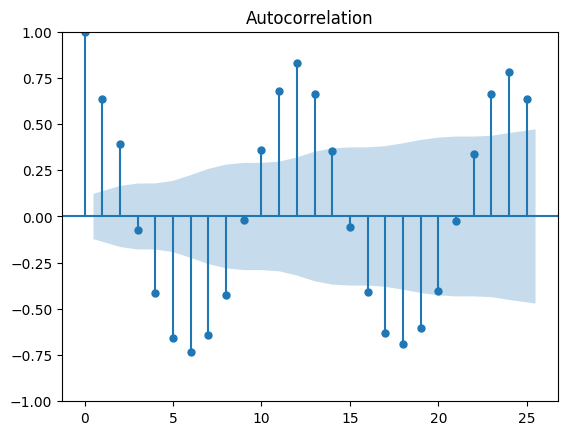

In [ ]:
plot_acf(diff_features['평균최고기온'])
plt.show()

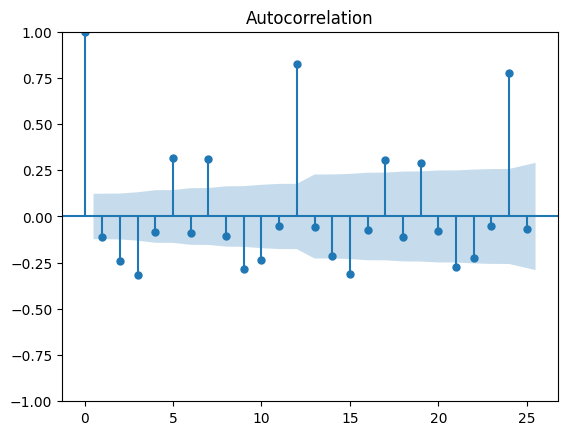

In [ ]:
plot_acf(diff_target)
plt.show()

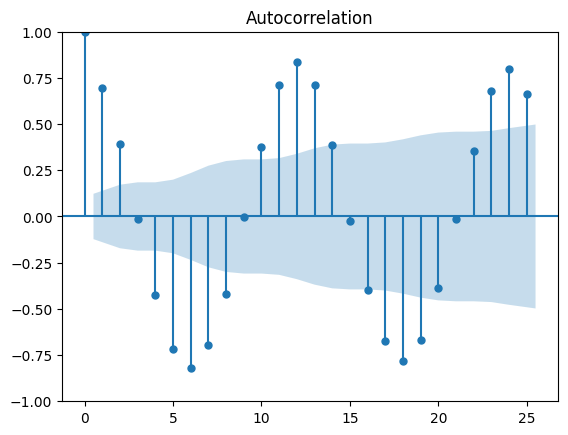

In [ ]:
plot_acf(diff_features['평균최저기온'])
plt.show()

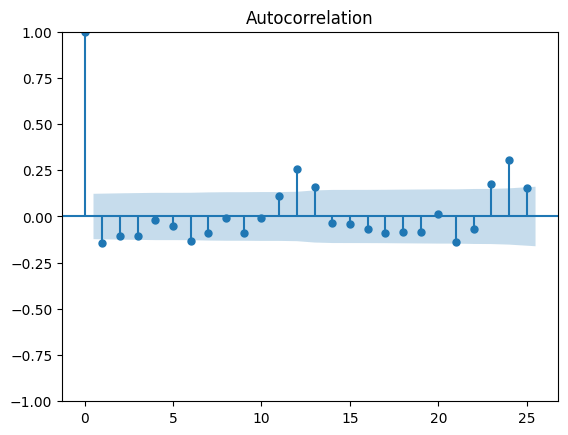

In [ ]:
plot_acf(diff_features['평균강수량'])
plt.show()

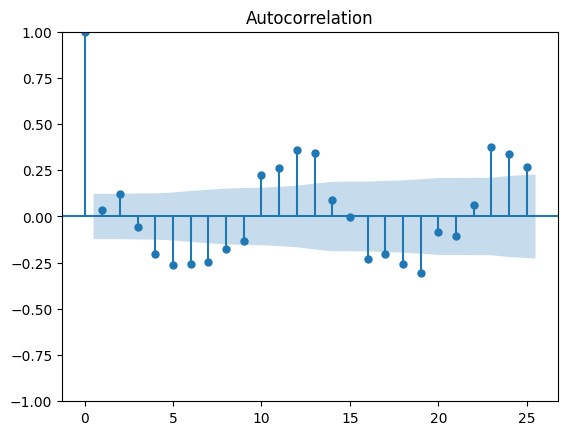

In [ ]:
plot_acf(diff_features['평균습도'])
plt.show()

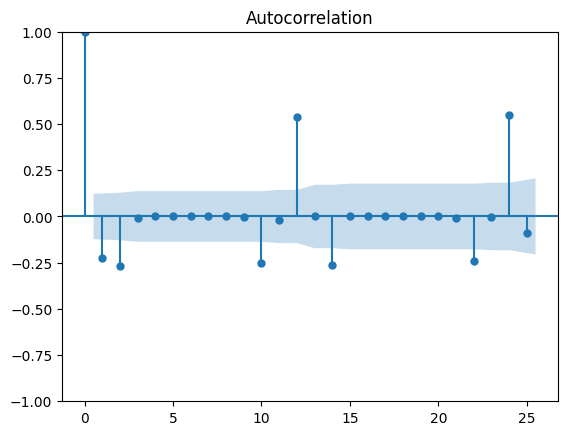

In [ ]:
plot_acf(diff_features['열대야'])
plt.show()

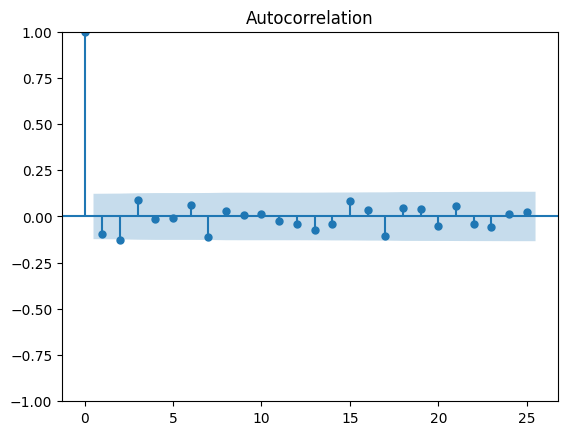

In [ ]:
plot_acf(diff_features['환율'])
plt.show()

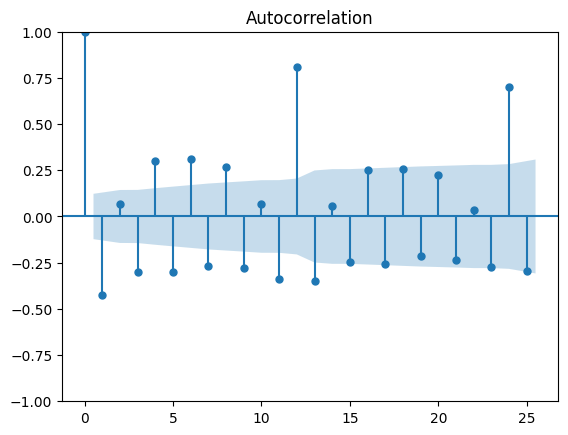

In [ ]:
plot_acf(diff_features['금 거래량(g)'])
plt.show()

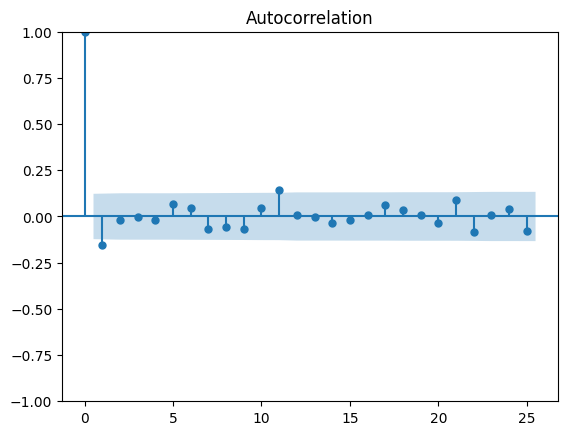

In [ ]:
plot_acf(diff_features['(금)시가'])
plt.show()

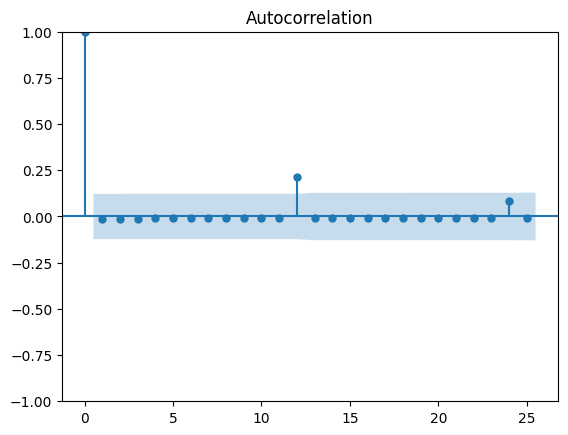

In [ ]:
plot_acf(diff_features['(한국 온실가스)총배출량'])
plt.show()

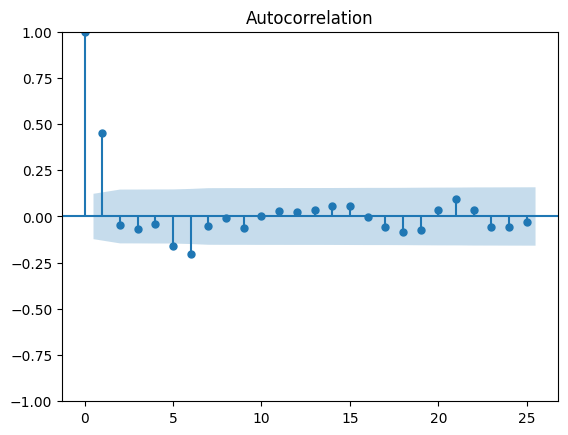

In [ ]:
plot_acf(diff_features['보통휘발유가격'])
plt.show()

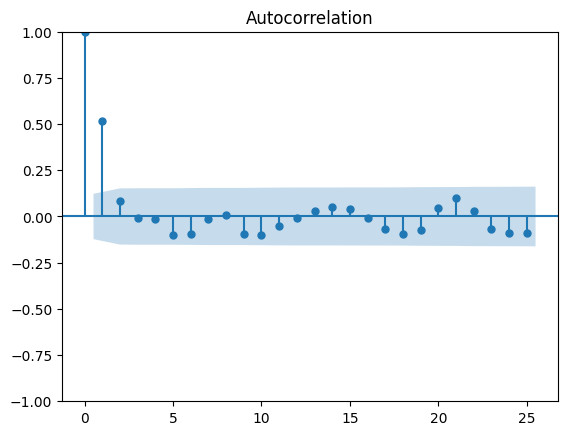

In [ ]:
plot_acf(diff_features['자동차용경유가격'])
plt.show()

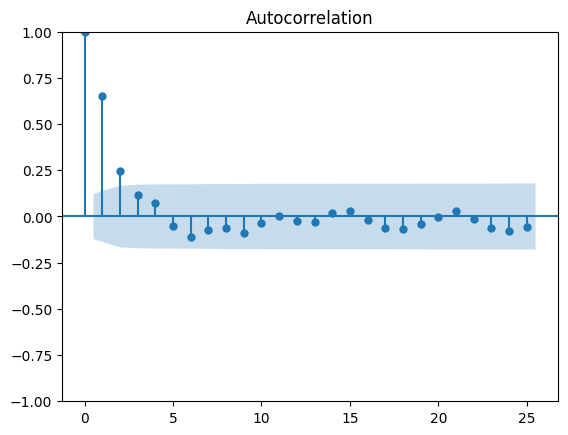

In [ ]:
plot_acf(diff_features['실내등유가격'])
plt.show()

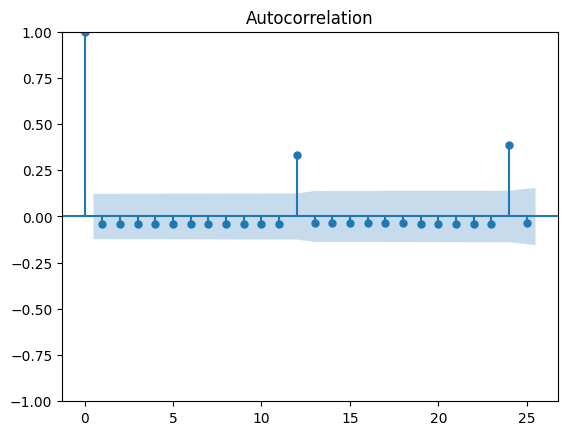

In [ ]:
plot_acf(diff_features['(세계 온실가스)총배출량'])
plt.show()

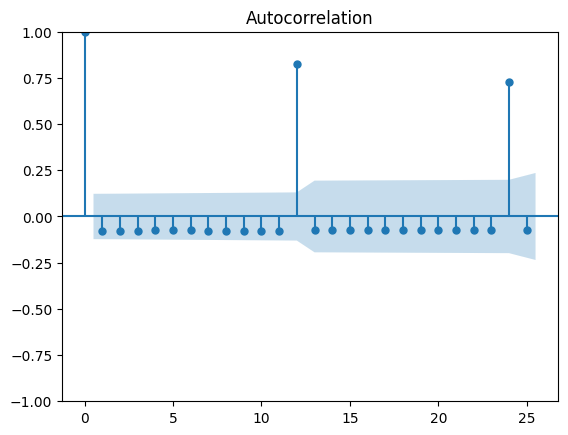

In [ ]:
plot_acf(diff_features['국내총생산(명목, 원화표시) (십억원)'])
plt.show()

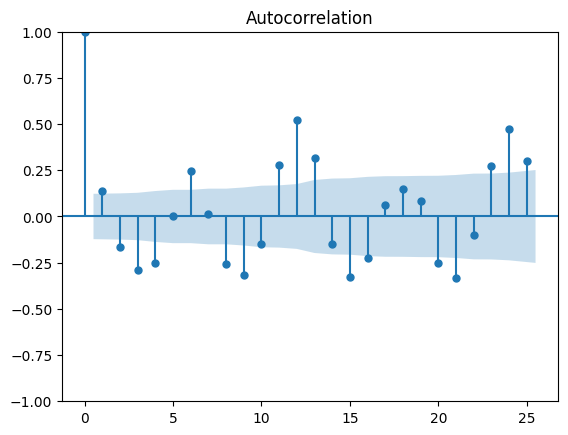

In [ ]:
plot_acf(diff_features['(세계) 해수면 평균기온(℃)'])
plt.show()

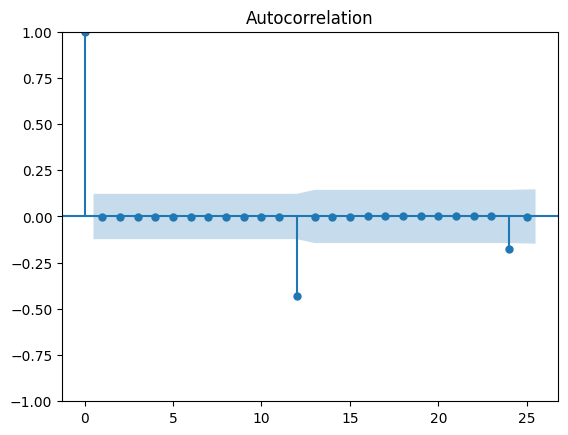

In [ ]:
plot_acf(diff_features['경제 성장률'])
plt.show()

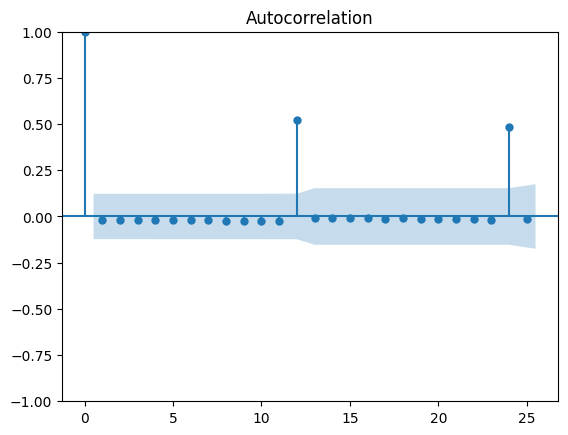

In [ ]:
plot_acf(diff_features['인구수'])
plt.show()